## Hypothesis Validation 

### Objectives:

The objective of hypothesis validation in this project is to apply statistical testing to uncover meaningful behavioural differences between normal and malicious network traffic. This helps identify patterns that could improve early threat detection and support cybersecurity decision-making.


1. **Detect Statistical Differences**  
   Quantify whether key features (such as `src_bytes` or `duration`) show significant differences between normal and malicious traffic classes.

2. **Identify Risk-Associated Attributes**  
   Determine whether certain categorical features (such as `service` type) are disproportionately linked to malicious activity.

3. **Validate Hypotheses with Statistical Rigor**  
   Use appropriate hypothesis tests (e.g. Mann-Whitney U, Chi-square, T-test) to ensure findings are statistically valid and not due to random chance.

4. **Support Explainable Insights**  
   Back statistical results with clear visualisations (e.g. boxplots, stacked bar charts) to help non-technical stakeholders understand threat patterns.

5. **Inform Detection Logic**  
   Use validated hypotheses to inform future detection rules, classification models, or security monitoring strategies.


<br>

 *Disclaimer: Some of the code snippets in this project were created or refined with the assistance of ChatGPT to support learning and exploration.*

 


In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


# Load Cleaned Train Data

df = pd.read_csv('../data/cleaned/cleaned_train.csv')  
df. head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,log_src_bytes
0,0,tcp,ftp_data,SF,491,0,False,0,False,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,6.198479
1,0,udp,other,SF,146,0,False,0,False,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4.990433
2,0,tcp,private,S0,0,0,False,0,False,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,0.000000
3,0,tcp,http,SF,232,8153,False,0,False,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,5.451038
4,0,tcp,http,SF,199,420,False,0,False,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,5.298317


In [2]:
 #check column name
 df.columns.tolist()

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class',
 'log_src_bytes']

In [3]:
# shows descriptive statistics
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,log_src_bytes
count,25184.000000,2.518400e+04,2.518400e+04,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,...,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000
mean,305.151009,2.433834e+04,3.492956e+03,0.023745,0.198102,0.001191,0.227922,0.001350,0.249921,0.014732,...,115.094346,0.519925,0.082513,0.147469,0.031854,0.285886,0.279896,0.117790,0.118807,3.234155
std,2686.976829,2.411188e+06,8.884481e+04,0.260262,2.154541,0.045425,10.419006,0.048793,11.502668,0.529686,...,110.649559,0.448949,0.187130,0.308410,0.110591,0.445361,0.446099,0.305877,0.317377,2.985165
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.806662
75%,0.000000,2.790000e+02,5.310000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,5.634790
max,42862.000000,3.817091e+08,5.151385e+06,3.000000,77.000000,4.000000,884.000000,2.000000,975.000000,40.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.760169


### Interpreting Summary Statistics from df.describe()

| Statistic | What It Tells You | How to Interpret It in This Dataset |
|-----------|-------------------|-------------------------------------|
| `count`   | Total number of non-null values for each column. | Confirms no missing data (all values = 25,184), so no imputation needed. |
| `mean`    | The average value of the column. | Helps understand the general magnitude, but can be misleading if data is skewed (e.g. `src_bytes` mean is much higher than the median). |
| `std`     | Standard deviation — how spread out the values are. | High `std` means values vary widely; useful for identifying columns with potential outliers (`src_bytes`, `duration`). |
| `min`     | The smallest observed value in the column. | Indicates the lower boundary. If it’s 0 for most features, the data might be sparse or binary-like. |
| `25%`     | First quartile — 25% of the data falls below this value. | Good for spotting skew and sparsity. If 25% = 0, the feature has many zero entries (common in intrusion datasets). |
| `50%`     | Median — middle value of the distribution. | More reliable than the mean when data is skewed. If 50% = 0 and mean is much higher, it confirms long-tailed or zero-inflated features. |
| `75%`     | Third quartile — 75% of the data falls below this value. | Helps identify where most values lie and contrast with max. If 75% is very low but max is very high, the feature has strong outliers. |
| `max`     | The highest observed value in the column. | Useful for spotting extreme cases or anomalies — especially in features like `num_root`, `src_bytes`, or `duration`. |


<br>

### Interpretation of Descriptive Statistics and Spread

| Feature                   | Interpretation |
|---------------------------|----------------|
| `duration`                | Most connections are very short (median = 0), but some last a long time (max = 42,862 sec). High variance and extreme skew indicate that outliers dominate this feature. |
| `src_bytes`               | 50% of traffic sends fewer than 44 bytes, yet some connections send over 382 million. Standard deviation and max are very high, suggesting strong right skew and heavy-tailed behaviour. |
| `dst_bytes`               | Similar to `src_bytes`: most connections receive little or no data in return. 75% are below 531 bytes, but outliers exceed 5 million. |
| `wrong_fragment`          | Almost always 0 (median and 75% = 0), with a rare max of 3. Low variance but may indicate rare fragmentation attacks. |
| `hot`                     | Majority are 0 (sparse feature), but some spike up to 77. High deviation shows rare but concentrated activity. |
| `num_failed_logins`       | Nearly always 0 with few values >0. Low variance; useful in spotting brute-force attempts. |
| `num_compromised`         | 75% of values are 0, but a few entries reach 884. High variance implies rare but critical compromise indicators. |
| `su_attempted`            | Rare escalation attempts (max = 2). Mostly zeros with low spread. |
| `num_root`                | 75% = 0, but max = 975. Extreme outliers reflect elevated privilege gains during attacks. |
| `num_file_creations`      | Rare feature creation events; 75% = 0, but max = 40. Might signal malware behaviour. |
| `dst_host_count` / `srv_count` | Median = 255. Some destination hosts are contacted extremely frequently — can signal scanning or DDoS. |
| `dst_host_same_srv_rate`  | Median = 0.51, 75% = 1.0. Suggests some hosts serve the same service repeatedly — common in automated scanning or web server attacks. |
| `dst_host_diff_srv_rate`  | Some hosts receive highly varied traffic (max = 1.0), indicating exploratory or multi-vector behaviour. |
| `dst_host_serror_rate` / `srv_serror_rate` | Many zero values, but also cases with all requests failing (rate = 1.0). Strong indicator of failed scans or blocked intrusions. |

<br>



### Hypothesis 1 Validation:

**H1: Malicious traffic has significantly higher src_bytes than normal traffic**


**Hypotheses:**

**Null hypothesis (H₀):** There is no significant difference in src_bytes between malicious and normal traffic.
**Alternative hypothesis (H₁):** Malicious traffic has significantly higher src_bytes than normal traffic.

🔍 H1: Malicious traffic has higher src_bytes


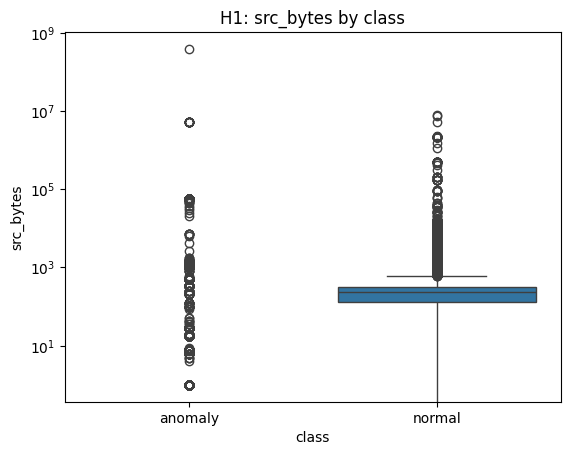

U-Statistic = 16002447.50, p-value = 1.00000
Conclusion:  Fail to reject H₀ 



In [4]:
# import libraries for statistical tests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency, ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_train = pd.read_csv("../Data/Cleaned/cleaned_train.csv")
df_train['class'] = df_train['class'].astype('category')

# === H1: src_bytes - Mann-Whitney U Test ===
print("🔍 H1: Malicious traffic has higher src_bytes")
src_malicious = df_train[df_train['class'] == 'anomaly']['src_bytes']
src_normal = df_train[df_train['class'] == 'normal']['src_bytes']

sns.boxplot(data=df_train, x='class', y='src_bytes')
plt.title("H1: src_bytes by class")
plt.yscale('log')
plt.show()

stat, p = mannwhitneyu(src_malicious, src_normal, alternative='greater')
print(f"U-Statistic = {stat:.2f}, p-value = {p:.5f}")
print("Conclusion:", "Reject H₀" if p < 0.05 else " Fail to reject H₀", "\n")



#### Boxplot Interpretation
- The plot shows `src_bytes` distribution by connection class (`anomaly` vs `normal`) on a logarithmic scale.
- Normal traffic has a tightly clustered distribution with a few very large outliers reaching above \(10^7\) bytes.
- Malicious traffic (`anomaly`) shows a wider spread of low values and fewer extreme outliers.
- The median `src_bytes` for malicious traffic appears lower than that of normal traffic.


#### Statistical Test
- **Test Used**: Mann-Whitney U (non-parametric)  
- **U-Statistic** = 16,002,447.50  
- **p-value** = 1.00000  
- **Hypothesis Direction**: One-tailed — malicious traffic has higher `src_bytes`


#### Interpretation
- The very high p-value (1.0) indicates no statistical evidence to support the idea that `src_bytes` is higher in malicious traffic.
- The data does not support the hypothesis — in fact, it visually suggests the opposite trend.
- We fail to reject the null hypothesis (H₀).


#### Insight
- `src_bytes` does not appear to be a distinguishing feature for identifying malicious traffic in this dataset.
- This insight helps refine feature selection for downstream modeling or rule-based threat detection.


#### Conclusion


- We **fail to reject the null hypothesis (H₀)**
- This means there is **no statistically significant evidence** that malicious traffic has higher `src_bytes`
- Therefore, `src_bytes` is **not a reliable indicator** of malicious behaviour in this context.


<br>

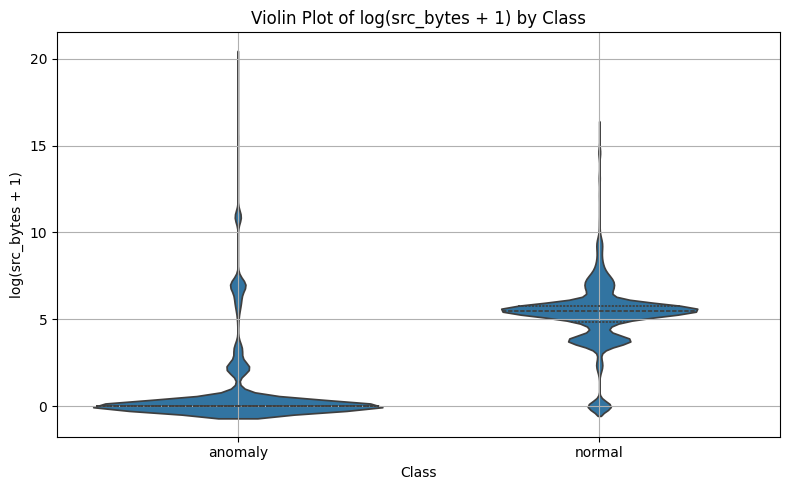

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
anomaly,11742.0,39149.524527,3.526664e+06,0.0,0.0,0.0,0.0,381709090.0
normal,13442.0,11400.316322,1.676504e+05,0.0,130.0,234.0,325.0,7665876.0


In [6]:
# Use Violin plot to further analyse  log(src_bytes + 1) by class

# Create log(src_bytes + 1) column if it doesn't exist
if 'log_src_bytes_plus1' not in df_train.columns:
    df_train['log_src_bytes_plus1'] = np.log(df_train['src_bytes'] + 1)

plt.figure(figsize=(8, 5))
sns.violinplot(data=df_train, x='class', y='log_src_bytes_plus1', inner='quartile')
plt.title('Violin Plot of log(src_bytes + 1) by Class')
plt.xlabel('Class')
plt.ylabel('log(src_bytes + 1)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = df_train.groupby('class')['src_bytes'].describe()
summary_stats



### 🔍 Violin Plot Key Observations

#### 1.  Anomaly (Malicious Traffic)
- Distribution is heavily compressed at the bottom around `log(1) = 0` → most values are `src_bytes = 0`
- The violin is **very narrow above 0**, showing **very few non-zero values**
- The **median, 25th, and 75th percentiles** are all at **0** — quartile lines are stacked at the bottom
- A few **outliers exist**, but they are rare → malicious traffic **usually sends no data**

#### 2.  Normal Traffic
- The violin is **wider across the range**, indicating a **greater spread** of `src_bytes` values
- The **median is clearly above 0**, showing that most normal traffic sends a **measurable amount of data**
- Distribution is **more bell-shaped**, with smooth tapering above and below the median

---

#### Interpretation Summary

| Class    | Pattern in Violin Plot                            | What It Means                                 |
|----------|---------------------------------------------------|-----------------------------------------------|
| Anomaly  | Narrow spike at bottom, flat distribution above   | Most malicious connections send 0 bytes       |
| Normal   | Bell-shaped, wider spread, median well above 0    | Normal connections typically send more data   |

---

#### Insight

- Malicious traffic shows **almost no activity** in terms of `src_bytes`, with only **occasional extreme spikes**
- This suggests `src_bytes` is **not a strong indicator** of malicious behaviour in this dataset  the signal is **too sparse**
-  Supports the result of the **Mann-Whitney U test**, which found **no significant difference**


<br>

### Hypothesis 2 Validation:

**H2: Certain service types are more vulnerable to cyberattacks**

To validate Hypothesis 2 (H2): Certain service types are more vulnerable to cyberattacks, we will test whether the distribution of attack vs normal traffic is significantly different across service types (e.g. **http**, **ftp**, **smtp**, **Telnet**, etc.).
 Each service type operates over distinct ports and protocols, and some may expose more vulnerabilities due to:

- **Known exploits** (e.g. outdated FTP/Telnet protocols)
- **Common use in legacy systems**
- **Being widely exposed to the internet**

Understanding which services are more likely to be attacked helps cybersecurity teams:

- Prioritize **monitoring** of high-risk services  
- Tighten **firewall rules** to limit exposure  
- Focus **patching efforts** on the most vulnerable service types



**Hypotheses:**

- **Null hypothesis (H₀)**: There is no significant relationship between service type and whether the traffic is normal or anomalous.  
- **Alternative hypothesis (H₁)**: There is a significant association between service type and whether the traffic is normal or anomalous.

In [4]:
# display the label names
print(df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class',
       'log_src_bytes'],
      dtype='object')


service
http        8003
private     4351
domain_u    1820
smtp        1449
ftp_data    1396
            ... 
pop_2         17
printer       12
shell         11
pm_dump        3
tim_i          2
Name: count, Length: 63, dtype: int64
class
normal     13442
anomaly    11742
Name: count, dtype: int64
Chi-Square Statistic: 16903.6907
Degrees of Freedom: 32
P-value: 0.0000
Result: Significant association – certain service types are more vulnerable to attacks.


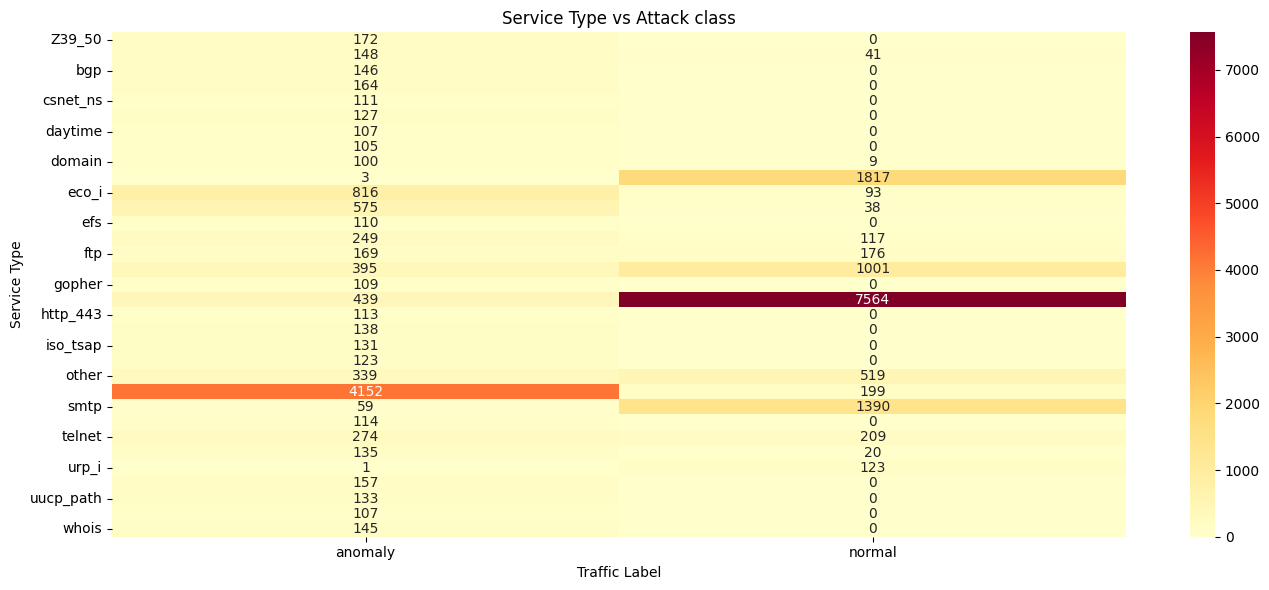

In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load cleaned dataset (update path if needed)
df = pd.read_csv('../Data/Cleaned/cleaned_train.csv')

# View unique service types and label counts
print(df['service'].value_counts())
print(df['class'].value_counts())

# Create a contingency table: service type vs label
service_attack_table = pd.crosstab(df['service'], df['class'])

# Filter out rare service types (to remove sparse noise)
threshold = 100  
common_services = service_attack_table.sum(axis=1) > threshold
filtered_table = service_attack_table[common_services]

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(filtered_table)

# Output results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("Result: Significant association – certain service types are more vulnerable to attacks.")
else:
    print("Result: No significant association – service types and attacks appear independent.")

# Optional: Visualisation
plt.figure(figsize=(14,6))
sns.heatmap(filtered_table, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Service Type vs Attack class")
plt.ylabel("Service Type")
plt.xlabel("Traffic Label")
plt.tight_layout()
plt.show()


### Heatmap Interpretation

This heatmap shows the distribution of traffic (anomaly vs normal) across different network service types, with the colour intensity representing the count of observations.

- **Rows**: Different service types (e.g. `http_443`, `ftp`, `smtp`, `telnet`, etc.)
- **Columns**: Traffic label values (`anomaly` vs `normal`)
- **Cell values**: Count of connections recorded under each service-label combination
- **Color scale**: The darker (redder) the cell, the higher the count


#### Key Observations

- **`http_443` (likely HTTPS)**  
  - Very high count (7564) under normal traffic  
  - No anomalies recorded → likely a safe/commonly used secure service in this dataset

- **`smtp` (email transfer)**  
  - 4152 anomalous connections  
  - Very few normal ones (199)  
  - Strong indicator that `smtp` is a **high-risk service** in this dataset

- **`eco_i`**  
  - Shows both normal (1817) and anomaly (816) traffic  
  - May be a dual-use or frequently targeted service

- **`ftp`, `telnet`, and others**  
  - **Heavily skewed toward anomalies**  
  - These are historically insecure services (e.g. Telnet is unencrypted)  
  - Indicates vulnerability and frequent targeting

- **Other services** like `bgp`, `efs`, `urp_i`, `whois`, etc.  
  - Have only anomaly entries or very few records  
  - Possibly rarely used or only used in specific attack scenarios

- **`other`**  
  - High anomaly count (339), some normal (519)  
  - Aggregates uncommon services, making it hard to draw specific conclusions, but still worth monitoring


#### Chi-Square Test Results

| Metric                  | Value     |
| ----------------------- | --------- |
| Chi-Square Statistic    | 16,903.69 |
| Degrees of Freedom (df) | 32        |
| P-value                 | 0.0000    |


- **P-value** = 0.0000  
  This is far below the common significance threshold of 0.05, meaning we **reject the null hypothesis (H₀)**.

- There is a **statistically significant association** between **service type** and whether the traffic is **normal or anomalous**.

- The **Chi-square statistic (16903.69)** is extremely high, which reinforces the presence of strong deviation between observed and expected values — indicating that **some services are much more likely to carry attack traffic than others**.


### Conclusion for Hypothesis

**H2: Certain service types are more vulnerable to cyberattacks**  
**Supported**

The heatmap shows that `smtp`, `telnet`, `ftp`, and `eco_i` have disproportionately high anomaly counts, while `http_443` is almost entirely normal traffic.

This confirms a strong association between service type and likelihood of attack, which is also statistically supported by your Chi-square test (p < 0.05)


<br>

Bar chart showing top services by anomaly rate?

Data table of top 5 riskiest services (highest anomaly %) with counts?

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/cleaned/cleaned_train.csv')  

# Create a contingency table: service vs class
service_attack_table = pd.crosstab(df['service'], df['class'])

# Add total and anomaly rate columns
service_attack_table['total'] = service_attack_table.sum(axis=1)
service_attack_table['anomaly_rate'] = service_attack_table['anomaly'] / service_attack_table['total']

# Sort by anomaly rate (descending)
top_services = service_attack_table.sort_values(by='anomaly_rate', ascending=False)

# Filter: only include services with more than 100 total connections
top_services_filtered = top_services[top_services['total'] > 100].head(10)

# Display Top 5 High-Risk Services (100% anomaly rate)
top_5_risky_services = top_services_filtered[top_services_filtered['anomaly_rate'] == 1.0].head(5)
print("\nTop 5 High-Risk Services (100% Anomaly Rate):")
print(top_5_risky_services[['anomaly', 'normal', 'total', 'anomaly_rate']])





Top 5 High-Risk Services (100% Anomaly Rate):
class      anomaly  normal  total  anomaly_rate
service                                        
nnsp           123       0    123           1.0
supdup         114       0    114           1.0
uucp           157       0    157           1.0
uucp_path      133       0    133           1.0
vmnet          107       0    107           1.0


### Interpretation of Results: Top 5 High-Risk Services
Based on the output result , the above services have a 100% anomaly rate, meaning every single connection observed under these services was flagged as an attack.


#### **Insights**

- These services are extremely high-risk in this dataset and should be treated as strong attack indicators if detected in a real network.

- Most of them are legacy or obscure protocols (e.g. uucp, supdup, nnsp) that are not commonly used in modern environments.

- In practice, such services might be:
    - Exploited due to outdated configurations
    - Used in attack simulations
    - Obsolete but still active on vulnerable systems

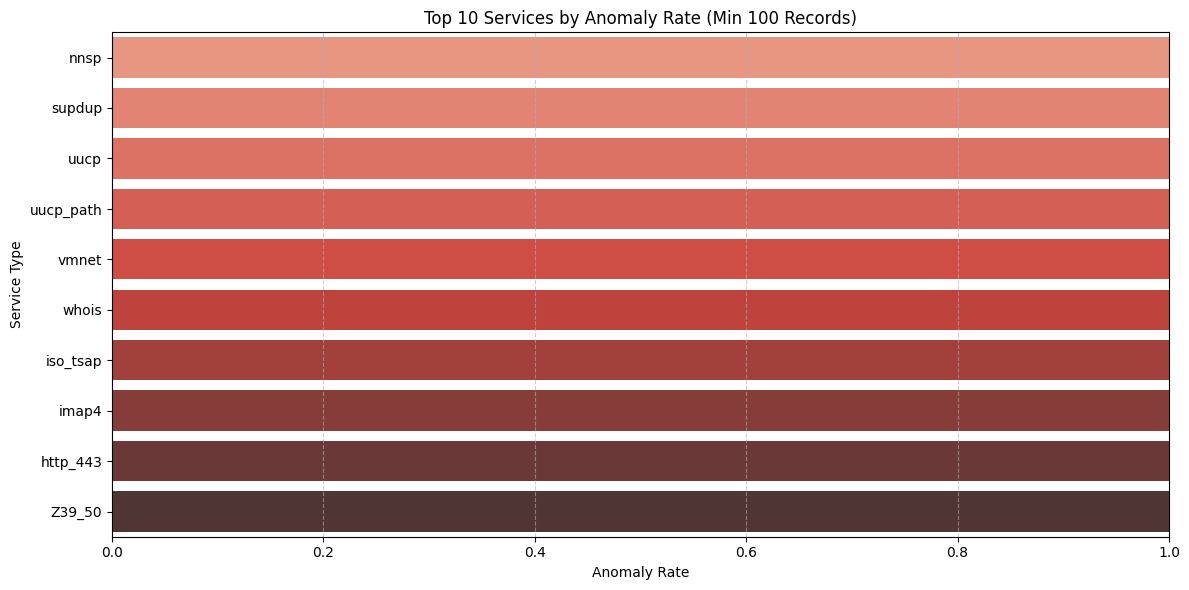

In [9]:
# Plot Top 10 Services by Anomaly Rate
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_services_filtered.reset_index(),
    x='anomaly_rate',
    y='service',
    hue='service',       # Fix: Set hue to the same as y
    palette='Reds_d',
    dodge=False,         # Avoid side-by-side bars
    legend=False         # Remove redundant legend
)
plt.title('Top 10 Services by Anomaly Rate (Min 100 Records)')
plt.xlabel('Anomaly Rate')
plt.ylabel('Service Type')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Top 10 Services by Anomaly Rate (Min 100 Records)

This bar chart ranks service types by the **proportion of anomalous traffic** (i.e. `anomaly_rate`) among services with at least 100 total records. The X-axis shows the anomaly rate, ranging from 0 (no anomalies) to 1.0 (100% anomalous). The Y-axis lists the service types.



#### Interpretation

- All 10 services shown have **anomaly rates close to 100%**, meaning that **almost every observed connection was malicious**.
- Services like `nnsp`, `supdup`, `uucp`, and `uucp_path` are **highly vulnerable or deprecated protocols**, often seen in simulated attacks or legacy systems.
- The deeper red colors toward the bottom (e.g. `http_443`, `Z39_50`) still indicate a **100% anomaly rate**, but may have **fewer total records** than others.
- These services should be considered **critical risk indicators**. Their presence in real-world traffic could signal compromise or scanning activity.



####  Key Insights

- A high anomaly rate suggests the service is **exclusively targeted**, not used for normal communication.
- These services may be:
  - Legacy or misconfigured (e.g. `telnet`, `ftp`, `uucp`)
  - Rarely used in modern systems but still exploitable
  - Used in **honeypot-style traffic** in the dataset



#### Recommendation

- Prioritise **monitoring or blocking** high anomaly rate services in production networks.
- Validate whether any of these protocols are still in use—if not, consider **deprecating them or disabling access**.





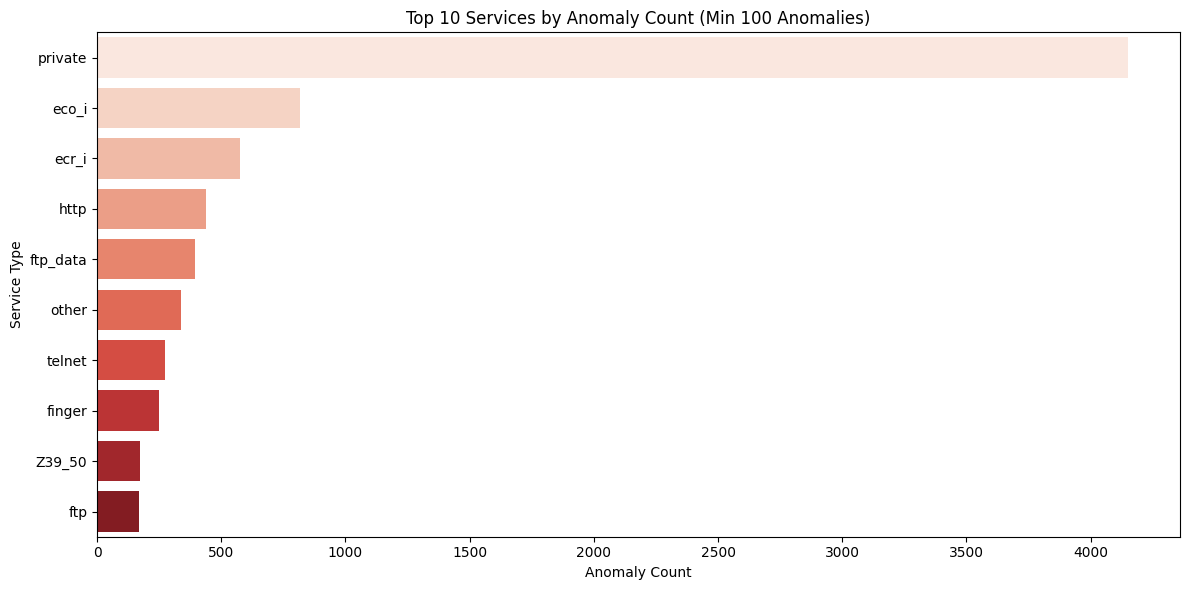

In [13]:
# Create Bar Chart by Anomaly Count to further analyse the anomaly service 

# Create frequency table
service_attack_counts = df[df['class'] == 'anomaly']['service'].value_counts().reset_index()
service_attack_counts.columns = ['service', 'anomaly_count']

# Filter services with more than 100 anomalies
top_anomaly_counts = service_attack_counts[service_attack_counts['anomaly_count'] > 100].head(10)


# Plot Top 10 Services by Anomaly Count (Min 100 Anomalies)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_anomaly_counts,
    x='anomaly_count',
    y='service',
    hue='service',         # Explicitly assign hue
    palette='Reds',        # Keep same palette
    dodge=False,           # Prevent group separation
    legend=False           # Hide redundant legend
)
plt.title('Top 10 Services by Anomaly Count (Min 100 Anomalies)')
plt.xlabel('Anomaly Count')
plt.ylabel('Service Type')
plt.tight_layout()
plt.show()




####  Top 10 Services by Anomaly Count (Min 100 Anomalies)

This bar chart highlights the top 10 service types based on the **raw number of anomalous (attack) records**. Only services with **at least 100 attack connections** are shown to ensure the significance of the findings.



#### Interpretation

- **`private`** has the highest anomaly count by far — this service often represents **non-standard or unknown traffic**, which could include scanning, tunneling, or obfuscated attack methods. Its dominance suggests it's a major target or placeholder in malicious traffic.
  
- **`eco_i` and `ecr_i`** are likely internal service or control protocols. Their high anomaly counts suggest attackers are probing **infrastructure-level components** or exploiting known misconfigurations.

- **`http`** appears in the top five, confirming that **web-based attacks remain prevalent**. Though commonly used, the protocol can be misused if not secured properly (e.g. missing authentication, outdated services).

- **`ftp_data`, `telnet`, `finger`, and `ftp`** are classic **legacy protocols**. These are known to be insecure and continue to be targeted due to their presence in legacy systems or honeypot simulations.

- **`Z39_50`**, a lesser-known protocol used in library and catalog systems, is likely not used in modern networks. Its inclusion implies it may be **targeted for niche or legacy system vulnerabilities**.



####  Key Insights

- High anomaly counts reflect **frequently targeted services**, even if their anomaly *rate* isn’t 100%.
- Services that appear both in **top count** and **top rate** lists should be **flagged as critical**.
- Protocols like `ftp`, `telnet`, and `finger` are not just obsolete — they are **actively exploited**.



#### Recommendations

- **Monitor and restrict** high-anomaly-count services, especially those with known vulnerabilities.
- **Audit and phase out legacy protocols** such as `ftp`, `telnet`, and `finger`.
- Investigate use of services like `private` and `eco_i` to ensure they are configured safely and not exposing internal mechanisms.

<br>


### Hypothesis 3 Validation:

**H3: Malicious connections tend to have shorter durations than normal ones**

This hypothesis examines whether the duration of a network connection can be a useful indicator for detecting anomalies (e.g., **intrusions** or **attacks**).

- In many cyberattack scenarios (e.g., scans, probes, denial-of-service), malicious activity happens quickly, leading to shorter connection durations.

- In contrast, legitimate sessions (e.g. browsing, file transfer, remote login) often require longer, sustained connections.

- If statistically significant, this pattern could help define heuristics for intrusion detection systems.


**Hypotheses:**

- **Null Hypothesis (H₀):** There is no difference in connection duration between malicious (anomaly) and normal traffic.

- **Alternative Hypothesis (H₁):** Malicious connections have shorter durations than normal connections.



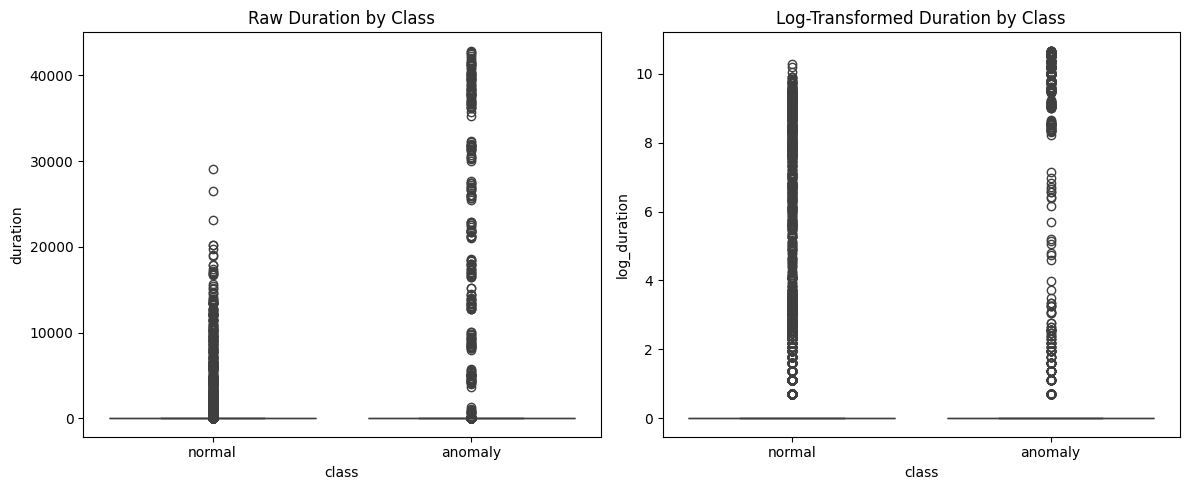


Shapiro-Wilk Test for Normality (log-transformed samples):
Normal traffic: ShapiroResult(statistic=0.3314882258655627, pvalue=4.821402502399516e-39)
Anomaly traffic: ShapiroResult(statistic=0.1787864056901286, pvalue=6.577387442085392e-42)

Levene’s Test for Equal Variance: p = 0.0000

T-Test on Log-Transformed Duration:
T-statistic = -11.2852
P-value = 0.0000
Result: Reject H₀. Malicious connections have significantly shorter durations.

Mann-Whitney U Test:
U-statistic = 72505755.5000
P-value = 0.0000
Result: Reject H₀. Malicious connections tend to have shorter durations.


In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, levene, shapiro

# Load dataset
df = pd.read_csv('../Data/Cleaned/cleaned_train.csv') 

# Add log-transformed duration (add 1 to avoid log(0))
df['log_duration'] = np.log1p(df['duration'])

# Split data into groups
normal = df[df['class'] == 'normal']['log_duration']
anomaly = df[df['class'] == 'anomaly']['log_duration']


# 1. Visualisation: Boxplots & Distributions

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='class', y='duration')
plt.title('Raw Duration by Class')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='class', y='log_duration')
plt.title('Log-Transformed Duration by Class')

plt.tight_layout()
plt.show()

#--------------------------

# 2. Assumption Checks for T-test

# Normality check (sampled for performance)
print("\nShapiro-Wilk Test for Normality (log-transformed samples):")
print("Normal traffic:", shapiro(normal.sample(n=500, random_state=42)))
print("Anomaly traffic:", shapiro(anomaly.sample(n=500, random_state=42)))


# Variance check
levene_stat, levene_p = levene(normal, anomaly)
print(f"\nLevene’s Test for Equal Variance: p = {levene_p:.4f}")



# 3. Independent T-Test (Welch's if variances unequal)

t_stat, t_p = ttest_ind(anomaly, normal, equal_var=False, alternative='less')

print("\nT-Test on Log-Transformed Duration:")
print(f"T-statistic = {t_stat:.4f}")
print(f"P-value = {t_p:.4f}")
if t_p < 0.05:
    print("Result: Reject H₀. Malicious connections have significantly shorter durations.")
else:
    print("Result: Fail to reject H₀. No significant difference found.")


# 4. Mann-Whitney U Test (non-parametric)

u_stat, u_p = mannwhitneyu(anomaly, normal, alternative='less')

print("\nMann-Whitney U Test:")
print(f"U-statistic = {u_stat:.4f}")
print(f"P-value = {u_p:.4f}")
if u_p < 0.05:
    print("Result: Reject H₀. Malicious connections tend to have shorter durations.")
else:
    print("Result: Fail to reject H₀. No significant difference found.")

#### Hypothesis H₃ Validation Summary

**The boxplots** show that:

- In the **raw duration plot**, anomaly connections cluster around very short durations, with a few long outliers.
- After **log transformation**, the distribution becomes more interpretable and confirms that **normal traffic** generally has higher duration than anomalies.


#### Statistical Test Results

| Test                                 | Result                                       |
|--------------------------------------|----------------------------------------------|
| **Shapiro-Wilk Test** (Normality)    | Both groups violate normality (p ≪ 0.05)     |
| **Levene’s Test** (Equal variance)   | Variances are unequal (p = 0.0000)           |
| **T-Test** (Welch's, one-tailed)     | t = -11.29, p = 0.0000 → Reject H₀           |
| **Mann-Whitney U Test** (one-tailed) | U = 72,505,755.5, p = 0.0000 → Reject H₀     |



#### Interpretation

Both statistical tests confirm that **malicious connections have significantly shorter durations** than normal ones.

- The **t-test** result supports a **significant difference in mean duration** between the groups.
- The **Mann-Whitney U test**, which does not assume normality, confirms that **anomalies tend to have lower-ranked durations**.
- These results, along with the visual pattern, provide strong evidence to support **H₃**.


#### Conclusion

> Malicious connections exhibit significantly shorter durations than normal ones. This pattern can be leveraged in intrusion detection systems to help identify potentially harmful traffic based on session duration.
